In [57]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


In [59]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import dtreeviz

import graphviz
import pandas as pd
from sklearn import tree

# Classifier

In [60]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=random_state)
tree_classifier.fit(dataset[features], dataset[target])

DecisionTreeClassifier(max_depth=5, random_state=1234)

## Initialize shadow tree

In [21]:
dtv_model = dtreeviz.model(tree_classifier, x_data=dataset[features], y_data=dataset[target], feature_names=features, 
               target_name=target, class_names=[0, 1])

## Visualizations

### viz_leaf_samples

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


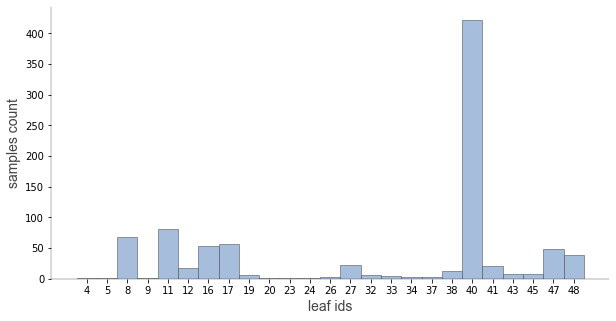

In [22]:
dtreeviz.leaf_sizes(dtv_model)

### ctreeviz_leaf_samples

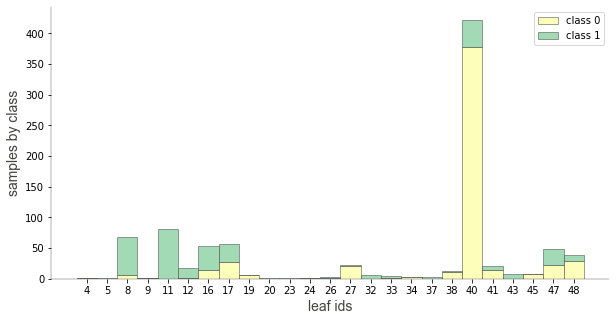

In [23]:
dtreeviz.ctree_leaf_distributions(dtv_model)

### dtreeviz

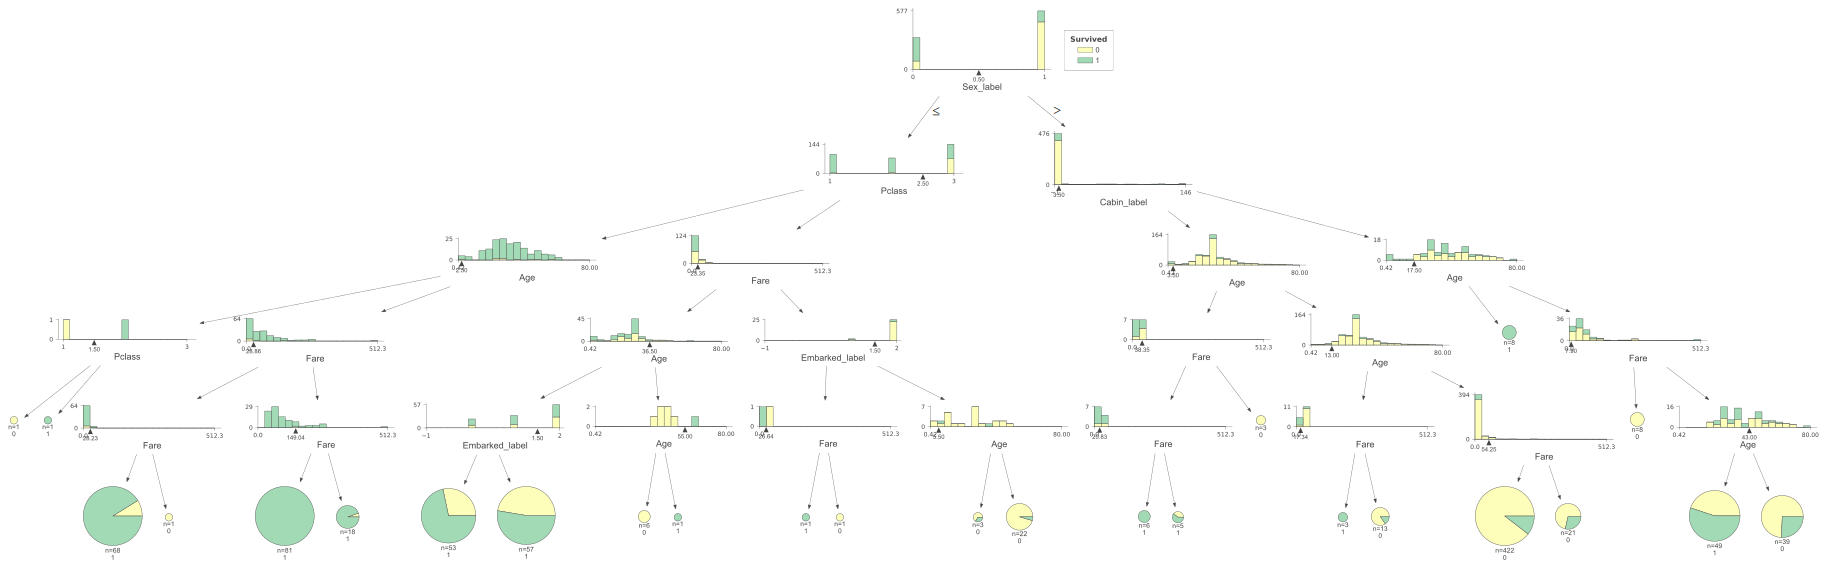

In [24]:
dtreeviz.view(dtv_model)

#### Displaying just a selected tree levels 

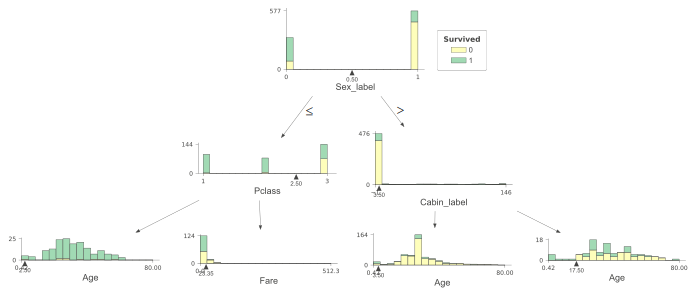

In [25]:
dtreeviz.view(dtv_model, depth_range_to_display=(0, 2))


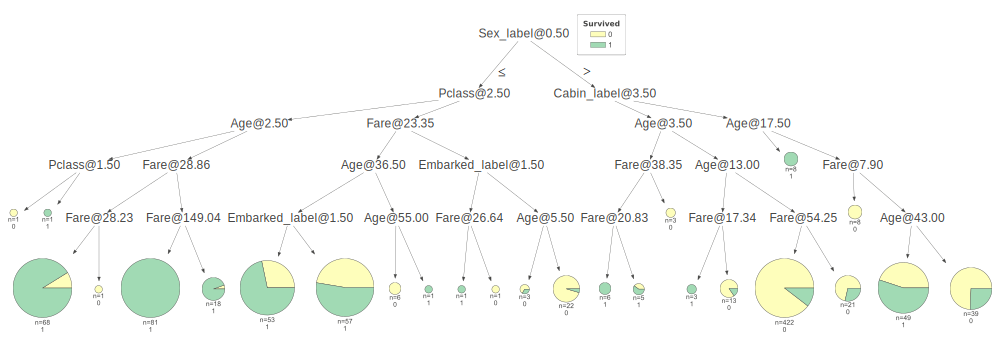

In [26]:
dtreeviz.view(dtv_model, fancy=False)

#### show just path

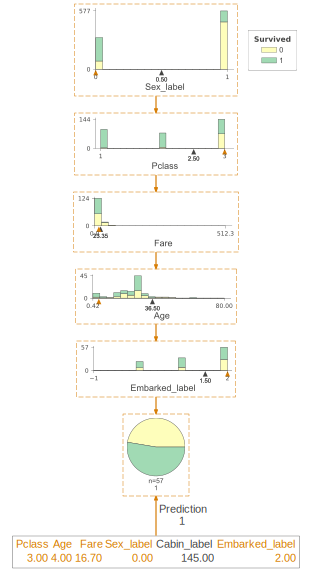

In [27]:
dtreeviz.view(dtv_model, show_just_path=True, X = dataset[features].iloc[10])

### viz_leaf_criterion

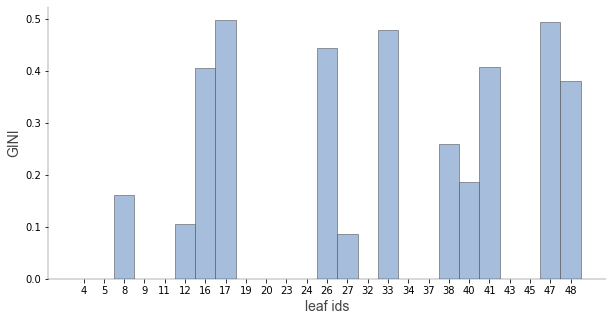

In [28]:
dtreeviz.leaf_purity(dtv_model)

### describe_node_sample

In [33]:
dtreeviz.node_stats(dtv_model, node_id=10)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,99.000000,99.000000,99.000000,99.0,99.000000,99.000000
mean,1.121212,32.434254,102.443224,0.0,52.727273,1.040404
std,0.328035,13.047117,73.269623,0.0,44.366704,1.029357
min,1.000000,3.000000,29.000000,0.0,-1.000000,-1.000000
25%,1.000000,23.000000,55.450000,0.0,9.500000,0.000000
50%,1.000000,30.000000,79.650000,0.0,47.000000,2.000000
75%,1.000000,39.500000,126.825000,0.0,88.000000,2.000000
max,2.000000,63.000000,512.329200,0.0,144.000000,2.000000


### explain_prediction_path

In [34]:
X = dataset[features].iloc[10]
X

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

In [36]:
print(dtreeviz.explain_prediction_path(dtv_model, X))

2.5 <= Pclass 
Age < 36.5
Fare < 23.35
Sex_label < 0.5
1.5 <= Embarked_label 



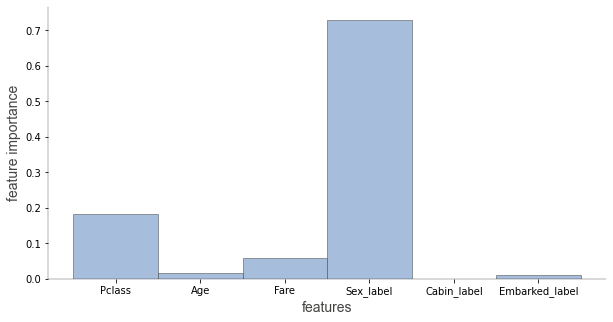

In [38]:
dtreeviz.instance_feature_importance(dtv_model, X)

# Regressor

In [39]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
tree_regressor.fit(dataset[features_reg], dataset[target_reg])


/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mae', max_depth=3, random_state=1234)

In [40]:
sk_dtree_reg = ShadowSKDTree(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

NameError: name 'ShadowSKDTree' is not defined

In [42]:
dtv_rmodel = dtreeviz.model(
                        model=tree_regressor, 
                        x_data=dataset[features_reg], 
                        y_data=dataset[target_reg], 
                        feature_names=features_reg, 
                        target_name=target_reg)


## Visualizations

### dtreeviz

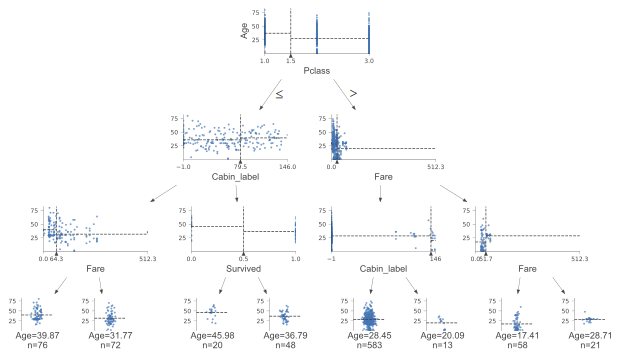

In [44]:
dtreeviz.view(dtv_rmodel)

#### show just path

In [45]:
x = dataset[features_reg].iloc[10]
x

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

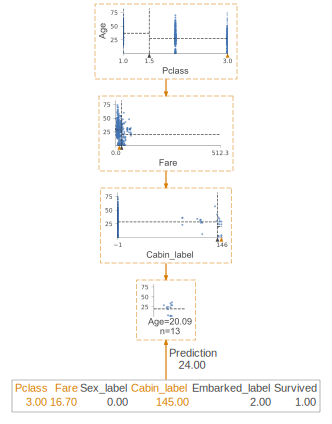

In [46]:
dtreeviz.view(dtv_rmodel, show_just_path=True, X = x)

### viz_leaf_samples

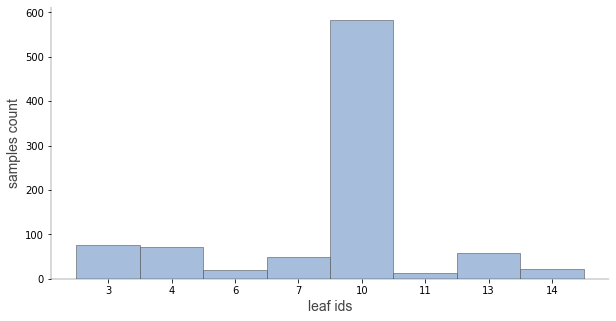

In [47]:
dtreeviz.leaf_sizes(dtv_rmodel)

### viz_leaf_criterion

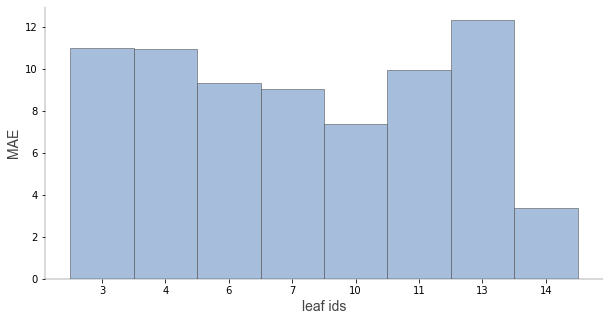

In [48]:
dtreeviz.leaf_purity(dtv_rmodel)

### viz_leaf_target

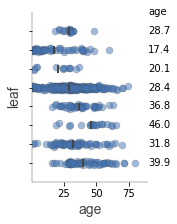

In [49]:
dtreeviz.rtree_leaf_distributions(dtv_rmodel)

### describe_node_sample

In [51]:
dtreeviz.node_stats(dtv_rmodel, node_id=1)

,Pclass,Fare,Sex_label,Cabin_label,Embarked_label,Survived
count,216.0,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.0,84.154687,0.564815,54.773148,1.175926,0.629630
std,0.0,78.380373,0.496933,43.781906,0.996073,0.484026
min,1.0,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,1.0,30.923950,0.000000,13.750000,0.000000,0.000000
50%,1.0,60.287500,1.000000,53.500000,2.000000,1.000000
75%,1.0,93.500000,1.000000,91.250000,2.000000,1.000000
max,1.0,512.329200,1.000000,146.000000,2.000000,1.000000


### explain_prediction_path

In [52]:
X_reg = dataset[features_reg].iloc[10]
X_reg

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

In [53]:
print(dtreeviz.explain_prediction_path(dtv_rmodel, X_reg))

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 



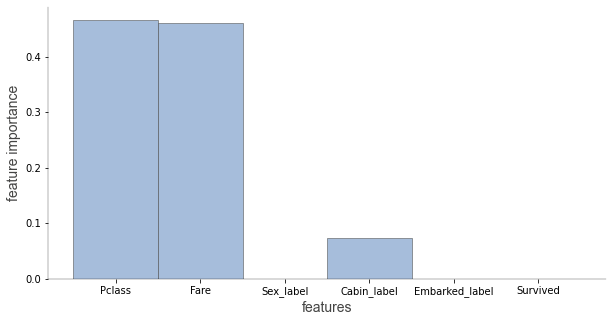

In [54]:
dtreeviz.instance_feature_importance(dtv_rmodel, X_reg)

### rtreeviz_univar

In [66]:
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees

In [79]:
features_reg_univar = ["Pclass"]
target_reg = "Age"
dtr_univar = DecisionTreeRegressor(max_depth=2, random_state=random_state, criterion="absolute_error")
dtr_univar.fit(dataset[features_reg_univar], dataset[target_reg])


DecisionTreeRegressor(criterion='absolute_error', max_depth=2,
                      random_state=1234)

In [80]:
skdtree_univar = ShadowSKDTree(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)


/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


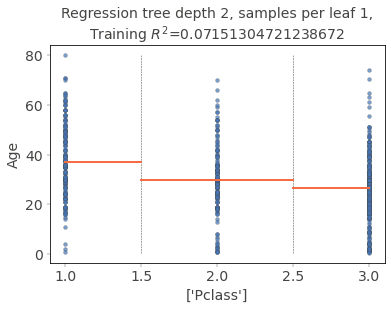

In [81]:
trees.rtreeviz_univar(skdtree_univar)

### rtreeviz_bivar_3D

In [83]:
features_reg_bivar = ["Age", "Fare"]
target_reg = "Pclass"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      random_state=1234)

In [84]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


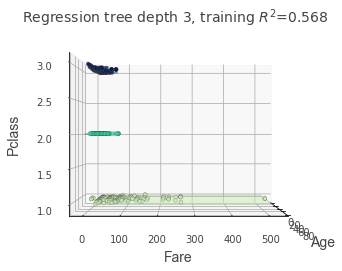

In [74]:
trees.rtreeviz_bivar_3D(skdtree_bivar)

### rtreeviz_bivar_heatmap

In [87]:
features_reg_bivar = ["Pclass", "Fare"]
target_reg = "Age"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      random_state=1234)

In [88]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


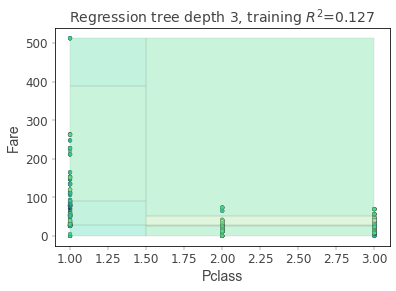

In [78]:
trees.rtreeviz_bivar_heatmap(skdtree_bivar)